# Pytorch Feed Forward Networks Workflow

- Building Multi perceptron neural network from scratch to pytorch modular

In [56]:
"""
cd .\02-FFN-pytorch-workflow\
jupyter nbconvert --to markdown ffn.ipynb --output README.md
"""
import torch
import torch.nn.functional as Fn
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Generate Dataset

In [3]:
from sklearn.datasets import make_blobs
data,labels = make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


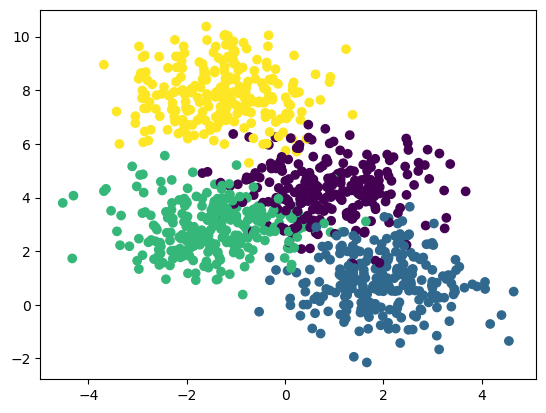

In [16]:
# mymap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green','blue'])
plt.scatter(data[:,0],data[:,1],c=labels)#,cmap=mymap)

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 2) (200, 2) (800,) (200,)


## Using torch tensor and autograd

<div align="center">
<img src="img/ShapeCalculation.png" alt="ShapeCalculation.png" width="900px">
</div>

In [95]:
X_train,X_test,y_train,y_test = map(torch.tensor,(X_train,X_test,y_train,y_test))
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

torch.Size([800, 2]) torch.Size([200, 2]) torch.Size([800]) torch.Size([200])


In [96]:
torch.manual_seed(0)
W1 = torch.randn(10,2) / math.sqrt(2) # Shape-> (L_out,L_in)
W1.requires_grad_()
b1 = torch.zeros(10,requires_grad=True) 

W2 = torch.randn(4,10) / math.sqrt(2) # Shape-> (L_out,L_in)
W2.requires_grad_()
b2 = torch.zeros(4,requires_grad=True)

print(W1.shape,W2.shape)

torch.Size([10, 2]) torch.Size([4, 10])


In [97]:
def model(X):
    a1 = torch.matmul(X,W1.T) + b1 # (N,2) x (2,10)^T => (N,10)
    # print(a1.shape)
    h1 = a1.sigmoid() # (N,10)
    # print(h1.shape)
    a2 = torch.matmul(h1,W2.T) + b2 # (N,10) x (10,4)^T => (N,4)
    # print(a2.shape)
    h2 = a2.softmax(dim=1) # (N,4)
    # print(h2.shape)
    return h2


In [98]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_hat, y):
    pred = torch.argmax(y_hat,dim=1)
    return (pred==y).float().mean()

Loss before training : 1.4318073987960815
Loss after training : 0.8514120578765869


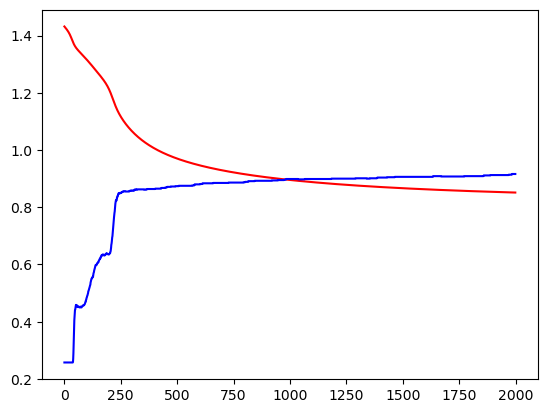

In [99]:
learning_rate = 0.2
epochs = 2000

X_train = X_train.float()
Y_train = y_train.long()

loss_err = []
acc_err = []

for epoch in range(epochs):
    y_hat = model(X_train)
    loss = Fn.cross_entropy(y_hat,Y_train)
    loss_err.append(loss.item())
    acc_err.append(accuracy_fn(y_hat,y_train))
    loss.backward()    
    
    with torch.no_grad():
        W1 -= W1.grad * learning_rate
        b1 -= b1.grad * learning_rate
        W2 -= W2.grad * learning_rate
        b2 -= b2.grad * learning_rate
        
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()
        
plt.plot(loss_err,'r-')
plt.plot(acc_err,'b-')

print(f"Loss before training : {loss_err[0]}")
print(f"Loss after training : {loss_err[-1]}")